# Proyecto: Aprendizaje supervisado aplicado a la estimación de gama y precio de autos
​
Este proyecto constará de tres fases: `Análisis exploratorio de datos`, `Preparación de datos` y `Modelamiento y evaluación`.

### 1. Análisis exploratorio de datos 
​​
Machine Learning en investigación de mercado automotor: El mercado automotor esta muy ligado a la cultura de cada país, según los gustos de cada uno, el mercado norteamericano, por ejemplo, valora mucho los motores y vehículos muy grandes, el mercado europeo prefiere el bajo consumo, el mercado latinoamericano, los precios finales bajos y asi varía según región, país, nivel socioeconómico y cultura. Un mismo vehículo puede tener un valor muy distinto de un pais al otro, y no solo por los impuestos o costos de producción, sino por cómo cotiza el modelo en el mercado.

### 2. Preparación de los datos:

Esto incluye la limpieza y transformación de los datos, abordando problemas como valores faltantes, datos duplicados y variables irrelevantes, a fin de mejorar la calidad del dataset para el modelado.
​
### 3. Modelamiento y evaluación

3.1. Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte, utilizando los datos que se han puesto a su disposición. 

3.2. Implementar un modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos, utilizando los datos que se han puesto a su disposición. 

### 1. Análisis exploratorio de datos

#### 1.1. Importación de librerías

In [151]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno  
import inflection 
import warnings 
import re

# Mostrar figuras de matplotlib en el entorno de Jupyter Notebook
%matplotlib inline

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

#### 1.2. Carga y visualización los datos.

In [152]:
car_data = pd.read_csv('ML_cars.csv')
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 1.3. Descripción del DataFrame

In [153]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### 1.4. Distribución porcentual entre variables categóricas y numéricas

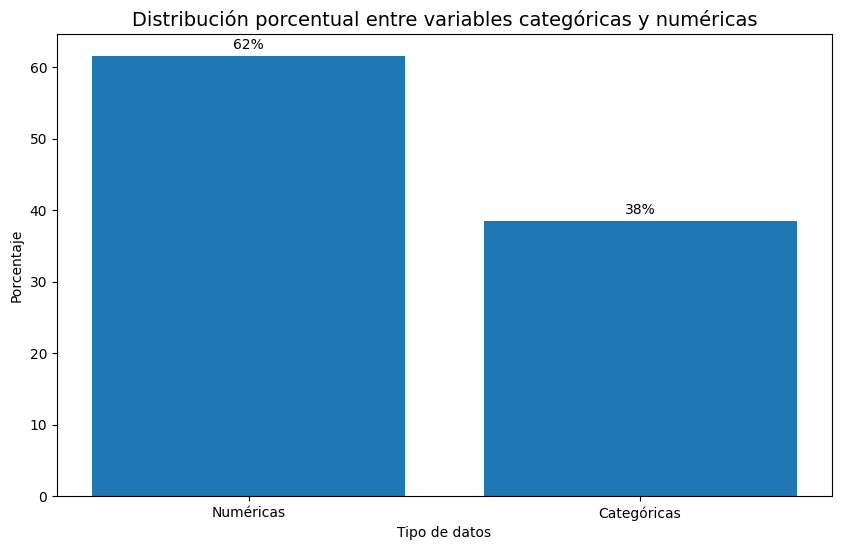

In [154]:
# Obtención de los tipos de datos de cada columna en el DataFrame
column_types = car_data.dtypes
discrete_count = sum(np.issubdtype(dtype, np.integer) for dtype in column_types)  # Contar el número de columnas discretas (enteros)
continuous_count = sum(np.issubdtype(dtype, np.floating) for dtype in column_types)  # Contar el número de columnas continuas (flotantes)
categorical_count = sum(np.issubdtype(dtype, object) for dtype in column_types)  # Contar el número de columnas categóricas (texto)

# Distribución porcentual
percentage_numerical = ((discrete_count + continuous_count) / len(column_types)) * 100
percentage_categorical = (categorical_count / len(column_types)) * 100

# Creación del gráfico de barras
categories = ['Numéricas', 'Categóricas']
percentages = [percentage_numerical, percentage_categorical]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages)
plt.title('Distribución porcentual entre variables categóricas y numéricas', fontsize=14)
plt.xlabel('Tipo de datos', fontsize=10)
plt.ylabel('Porcentaje', fontsize=10)

# Etiquetas
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.0f}%", ha='center', fontsize=10)

plt.show()


#### 1.5. Observaciones

1.5.1. Existen 26 columnas, las cuales son demasiadas y habrá que resolver de que forma reducirlas para llegar a unas cinco en total, las cuales serán las que más afectan al precio del auto.

1.5.2. Existen 205 instancias, no es mucho pero tampoco poco. Lo bueno es que no hay valores nulos.

1.5.3 Existe un 38 % de valores categóricos y un 62 % de valores numéricos:

    1.5.3.1. Respecto a los categóricos, se los convertirá en números para poder trabajar con ellos.
    
    1.5.3.1. Respecto a los numéricos, se procederá a revisar si es necesario algún tipo de limpieza y si existen outliers.

### 2. Preparación de los datos

#### 2.1. Normalización de los nombres de las columnas

In [155]:
print(f"* Nombres originales de las columnas:\n  {car_data.columns}\n")
print("- " * 40)
def convert_to_snake_case(column_name):
    return inflection.underscore(column_name)

car_data.columns = [convert_to_snake_case(col) for col in car_data.columns]

# Creación del diccionario con los titulos de las columnas a cambiar
diccionario_columnas = {
    'fueltype': 'fuel_type','doornumber': 'door_number', 'carbody': 'car_body', 'drivewheel': 'drive_wheel',
    'enginelocation': 'engine_location','wheelbase': 'wheel_base','carlength': 'car_length','carwidth': 'car_width',
    'carheight': 'car_height','curbweight': 'curb_weight','enginetype': 'engine_type','cylindernumber': 'cylinder_number',
    'enginesize': 'engine_size','fuelsystem': 'fuel_system','boreratio': 'bore_ratio','compressionratio': 'compression_ratio',
    'horsepower': 'horse_power','peakrpm': 'peak_rpm','citympg': 'city_mpg','highwaympg': 'highway_mpg'
}

# Cambio de los nombres de las columnas
for columna in car_data.columns:
    if columna in diccionario_columnas:
        nuevo_nombre = diccionario_columnas[columna]
        car_data.rename(columns={columna: nuevo_nombre}, inplace=True)

# Comprobación de que los nombres se hallan cambiado 
print(f"* Nuevos nombres de las columnas:\n  {car_data.columns}")

* Nombres originales de las columnas:
  Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
* Nuevos nombres de las columnas:
  Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')


#### 2.2. Distribución de los valores en las columnas numéricas

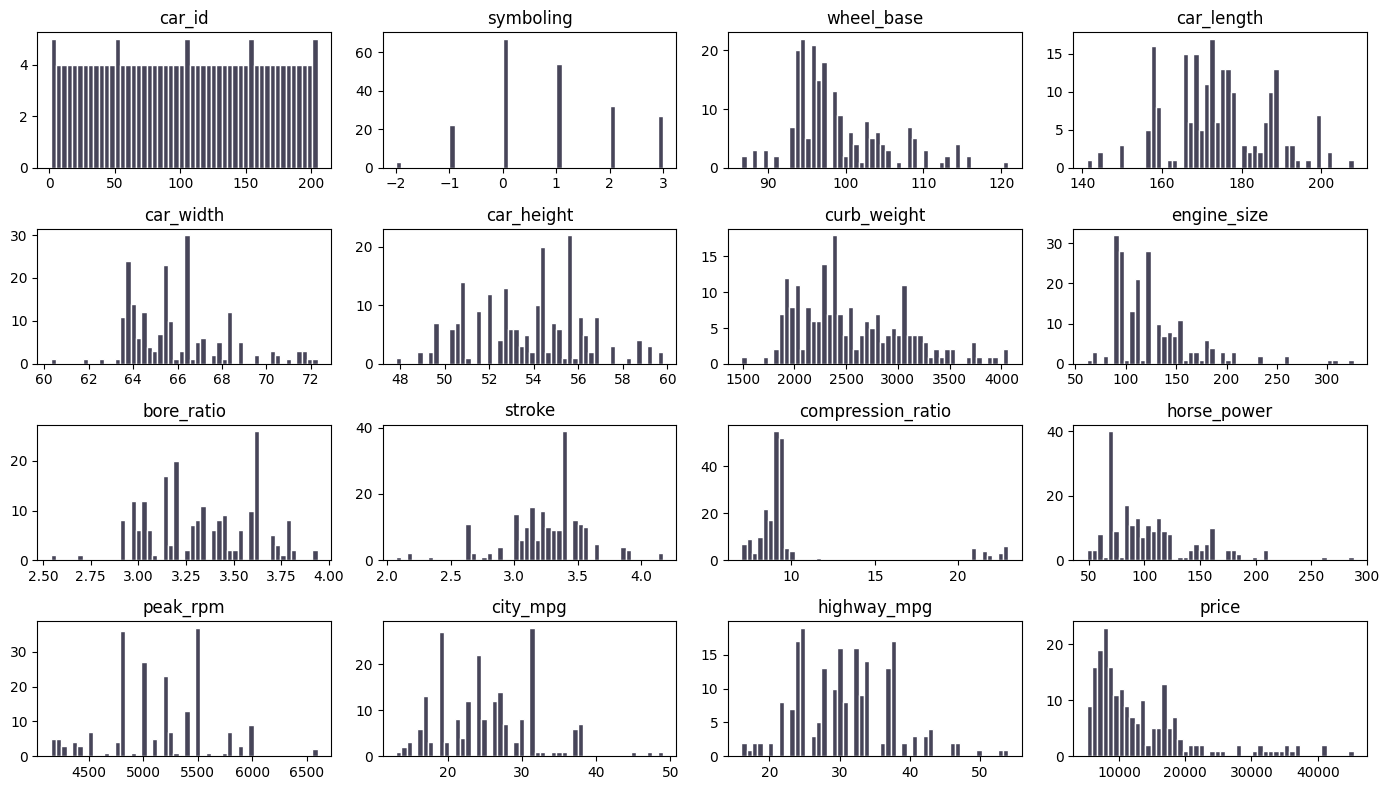

In [156]:
# Búsqueda de valores atipicos (outliers) mediante histogramas
numeric_columns = car_data.select_dtypes(include='number')
num_columns = len(numeric_columns.columns)

num_rows = (num_columns // 4) + (num_columns % 4)
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

axes = axes.flatten()

for i, col in enumerate(numeric_columns.columns):
    axes[i].hist(car_data[col], bins=50, color='#474559', edgecolor='white')
    axes[i].set_title(col)

plt.tight_layout()

plt.show()

#### 2.3. Separación de marca y modelo

In [157]:
# Distinción de la columna car_name en dos columnas (marca y modelo)
car_data['car_name'] = car_data['car_name'].str.lower()

# Corrección del split: usando n=1 como argumento de palabra clave
car_data[['marca', 'modelo']] = car_data['car_name'].str.split(' ', n=1, expand=True)
car_data = car_data[['car_id', 'car_name', 'marca', 'modelo'] + [col for col in car_data.columns if col not in ['car_id', 'car_name', 'marca', 'modelo']]]

# Reorganizamos las columnas para que 'car_id', 'car_name', 'marca', y 'modelo' sean las primeras
styled_cars = car_data.style.set_properties(**{'text-align': 'left'}, subset=['marca', 'modelo'])
styled_cars

# Estilo para alinear el contenido de las columnas 'marca' y 'modelo' a la izquierda
car_data = car_data.drop('car_name', axis=1)
print("* Los valores únicos de la columna marca son:")
print("- " * 37)
print(car_data.marca.unique())

* Los valores únicos de la columna marca son:
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


#### 2.4. Normalización de nombres de marca

In [158]:
marca_correccion = {'alfa-romero': 'alfa romeo', 
                    'maxda': 'mazda',
                    'Nissan': 'nissan',
                    'porcshce': 'porsche',
                    'toyouta': 'toyota', 
                    'vokswagen': 'volkswagen',
                    'vw': 'volkswagen'}
car_data['marca'] = car_data['marca'].replace(marca_correccion)

#### 2.5. Normalización de valores gategóricos a numéricos

In [159]:
# Redondear la columna 'price' y convertir a enteros
car_data['price'] = car_data['price'].round().astype(int)

# Cálculo de la mediana
median_precio = car_data['price'].median()

# Creación de la columna "gama" utilizando la condición de que si es gama alta será igual a 1 y si gama baja será igual a 0
car_data['gama'] = (car_data['price'] > median_precio).astype(int)
print(car_data[['price', 'gama']])

     price  gama
0    13495     1
1    16500     1
2    16500     1
3    13950     1
4    17450     1
..     ...   ...
200  16845     1
201  19045     1
202  21485     1
203  22470     1
204  22625     1

[205 rows x 2 columns]


In [160]:
# Diccionario de mapeo de valores
mapeo = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'ten': 10, 'twelve': 12}

In [161]:
# Conversión de la columna "door_number" de dato categórico a entero
car_data['door_number'] = car_data['door_number'].map(mapeo)  
print(car_data['door_number'])

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: door_number, Length: 205, dtype: int64


In [162]:
# Conversión de la columna "cylinder_number" de dato categórico a entero
car_data['cylinder_number'] = car_data['cylinder_number'].map(mapeo)
print(car_data['cylinder_number'])

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylinder_number, Length: 205, dtype: int64


### 2.6. Exportación

El archivo 'cleaned_dataset.csv' representa el conjunto de datos después de aplicar técnicas de limpieza y preprocesamiento. 

In [163]:
# Guardado del archivo en local 
car_data.to_csv('cars_cleaned.csv', index=False)

### 2.7. Observaciones

2.7.1. La columna 'price' fue redondeada y convertida a enteros para mejorar la claridad de su representación. Además, los nombres de los automóviles en la columna 'car_name' fueron transformados a formato snake_case para garantizar coherencia en la nomenclatura.

2.7.2. Se separó la columna car_name en dos columnas, marca y modelo, y se eliminaron valores duplicados en las marcas.

2.7.3. Se creó la variable 'gama', que clasifica los vehículos como baratos (valor por debajo de la mediana) o caros (valor por encima de la mediana), utilizando la mediana de 'price'.

2.7.4. Se realizaron convirtieron  las columnas 'door_number' y 'cylinder_number' en valores enteros

2.7.5. Aunque se identificaron algunos valores outliers en columnas como 'price', se interpreta que son valores reales del sector y se opta por mantenerlos, preservando la totalidad de la información

2.7.6. Se exporta el archivo como 'cleaned_dataset', listo para el análisis y modelado posteriores.

#### 2.8. Carga del nuevo archivo

In [164]:
cars = pd.read_csv('cars_cleaned.csv', sep=',')
cars.head()

,car_id,marca,modelo,symboling,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,...,fuel_system,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price,gama
0,1,alfa romeo,giulia,3,gas,std,2,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,1
1,2,alfa romeo,stelvio,3,gas,std,2,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,1
2,3,alfa romeo,quadrifoglio,1,gas,std,2,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,1
3,4,audi,100 ls,2,gas,std,4,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,1
4,5,audi,100ls,2,gas,std,4,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,1


#### 2.9. Visualización de variables numéricas mediante Histogramas para confirmar que no hubo errores en la limpieza de datos

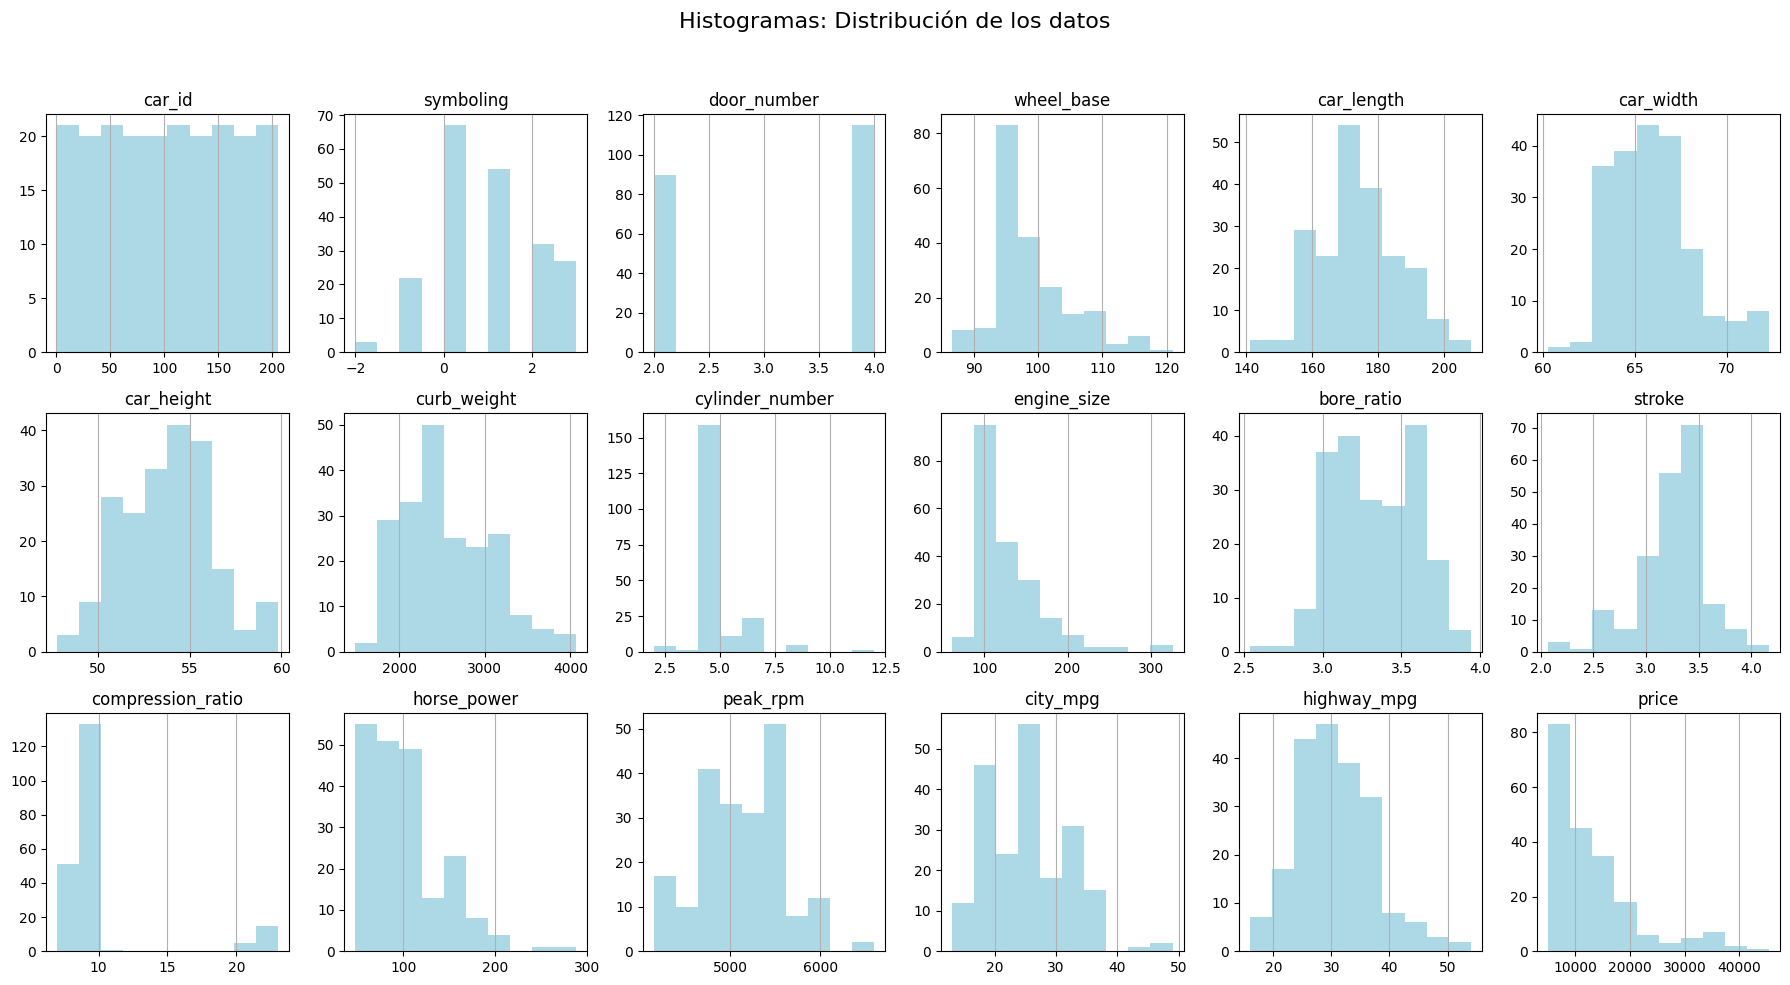

In [165]:
# Define la figura y los ejes para subgráficos
fig, axes = plt.subplots(3, 6, figsize=(18, 10))
fig.suptitle("Histogramas: Distribución de los datos", fontsize=16)

# Itera sobre las columnas numéricas y crea histogramas en los subgráficos correspondientes
for i, (col, ax) in enumerate(zip(cars.select_dtypes(include=np.number).columns, axes.flatten())):
    cars[col].hist(ax=ax, bins=10, color='lightblue')
    ax.set_title(col)
    ax.yaxis.grid(False)  # Desactiva las líneas horizontales de la cuadrícula en el eje y

# Ajusta la disposición
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta rect para dejar espacio para el título
plt.show()

### 3. Modelamiento y evaluación

#### 3.1. Importación de la libreria

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#### 3.2. Definición de la variable objetivo

In [167]:
# Separar características y variable objetivo (se elimina la variable 'price' porque en este caso no se necesita y se aprendería los datos de memoria)
X = cars.drop(['price', 'gama', 'car_id'], axis=1)
y = cars['gama']

#### 3.3. Conversión de variables categóricas a valores dummies

In [168]:
# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X, drop_first=True, dtype=float)
# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X

,symboling,door_number,wheel_base,car_length,car_width,car_height,curb_weight,cylinder_number,engine_size,bore_ratio,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### 3.4. Creación y entrenamiento del modelo

In [169]:
# Para este tipo de problema, donde hay que entresacar entre gama baja y gama alta, parece que el algoritmo más adecuado es árbol de decisión o random forest.
# Por tal motivo, se procede a trabajar con random forest, y luego se analiza con otros modelos además de ajustar hiperparámetros
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 3.5. Evaluación del modelo

In [170]:
# Obtener la precisión del modelo
precision = model_rf.score(X_test, y_test)
print(f'Precisión del modelo: {precision:.2f}')

Precisión del modelo: 0.95


In [171]:
# Obtener la importancia de las características
importancia = model_rf.feature_importances_

# Crear un DataFrame para visualizar las importancias
df_importancia = pd.DataFrame({'Atributo': X.columns, 'Importancia': importancia})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
df_importancia.head(10) # Se considerará los primeros 10 atributos como una primera aproximación dado que superan el 70 % en la importancia de los datos 

,Atributo,Importancia
6,curb_weight,0.157920
4,car_width,0.090767
3,car_length,0.084583
8,engine_size,0.079204
15,highway_mpg,0.072501
12,horse_power,0.071526
14,city_mpg,0.063495
2,wheel_base,0.055957
184,drive_wheel_rwd,0.029359
192,fuel_system_2bbl,0.026147


In [172]:
# Se consideran los primeros 10 atributos
important_columns = X.columns[importancia.argsort()[-10:]] 
print("Columnas más importantes: ", important_columns)

# Se entrena, prueba y evalua el modelo con los atributos filtrados
X_train_filtered = X_train[important_columns]
X_test_filtered = X_test[important_columns]

model_rf_filtered = RandomForestClassifier()
model_rf_filtered.fit(X_train_filtered, y_train)

y_train_pred = model_rf_filtered.predict(X_train_filtered)
y_test_pred = model_rf_filtered.predict(X_test_filtered)

## Obtención de las metricas para evaluar su consistencia y precision
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

# Evaluar usando Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Accuracy_train: ", accuracy_train)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy_test: ", accuracy_test)

# Evaluar usando F1-Score
f1_train = f1_score(y_train, y_train_pred, average='weighted')  # 'weighted' para problemas multiclase
print("F1-Score_Train: ", f1_train)
f1_test = f1_score(y_test, y_test_pred, average='weighted')  # 'weighted' para problemas multiclase
print("F1-Score_Test: ", f1_test)

# Generación de la matriz de confusión
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Matriz de confusión_Train:\n", conf_matrix_train)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión_Test:\n", conf_matrix_test)

# Evaluar usando ROC-AUC
if len(set(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, model_rf_filtered.predict_proba(X_test_filtered)[:, 1])
    print("ROC-AUC: ", roc_auc)

model_rf_filtered    

Columnas más importantes:  Index(['fuel_system_2bbl', 'drive_wheel_rwd', 'wheel_base', 'city_mpg',
       'horse_power', 'highway_mpg', 'engine_size', 'car_length', 'car_width',
       'curb_weight'],
      dtype='object')
Accuracy_train:  0.9939024390243902
Accuracy_test:  0.9512195121951219
F1-Score_Train:  0.9939031193785733
F1-Score_Test:  0.9512195121951219
Matriz de confusión_Train:
 [[80  0]
 [ 1 83]]
Matriz de confusión_Test:
 [[22  1]
 [ 1 17]]
ROC-AUC:  0.9975845410628019


RandomForestClassifier()

In [181]:
# Eliminar la columna 'Predicción Gama' si existe en X_test_filtered
if 'Predicción Gama' in X_test_filtered.columns:
    X_test_filtered = X_test_filtered.drop(columns=['Predicción Gama'])

# Se asegura que la predicción se hace sobre el conjunto de datos correcto
gama_pred = model_rf_filtered.predict(X_test_filtered)

# Crear un DataFrame con las predicciones y luego unirlo al DataFrame original
df_results = pd.DataFrame({'Predicción Gama': ['Gama Alta' if pred == 1 else 'Gama Baja' for pred in gama_pred]}, index=X_test_filtered.index)

# Añadir las predicciones al DataFrame original
X_test_filtered = X_test_filtered.join(df_results)

In [182]:
gama_pred = model_rf_filtered.predict(X_train_filtered)
df_results = pd.DataFrame({'Predicción Gamma': ['Gamma Alta' if pred == 1 else 'Gamma Baja' for pred in gama_pred]})

gama_pred


array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [ ]:
probabilidades = model.predict_proba(X_dummies)
df['probabilidad_caro'] = probabilidades[:, 1]

# Mostrar el dataset con las probabilidades y la predicción
print(df[['price', 'price_category', 'predicted_price_category', 'probabilidad_caro']].head())

Revisar codigo con los aportes del profe